## Predicting Housing Prices (using Boston Housing Dataset)

## Import relevant libraries 

In [1]:
import pandas as pd 
import numpy as np 
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the dataset 

In [2]:
raw_data = pd.read_csv("D:\\Data_Science_Project\\Project_2\\HousingData.csv")

In [3]:
df = raw_data.copy()

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Data Cleaning and Data Preprocessing 

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer 

numberical_col  = ['CRIM', 'ZN', 'INDUS', 'AGE','LSTAT']
numberical_imputer = SimpleImputer(strategy = 'mean' )
df[numberical_col] = numberical_imputer.fit_transform(df[numberical_col])


In [10]:
categorical_cols = ['CHAS']
categorical_imputer = SimpleImputer(strategy = 'most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Visualize the whole Data

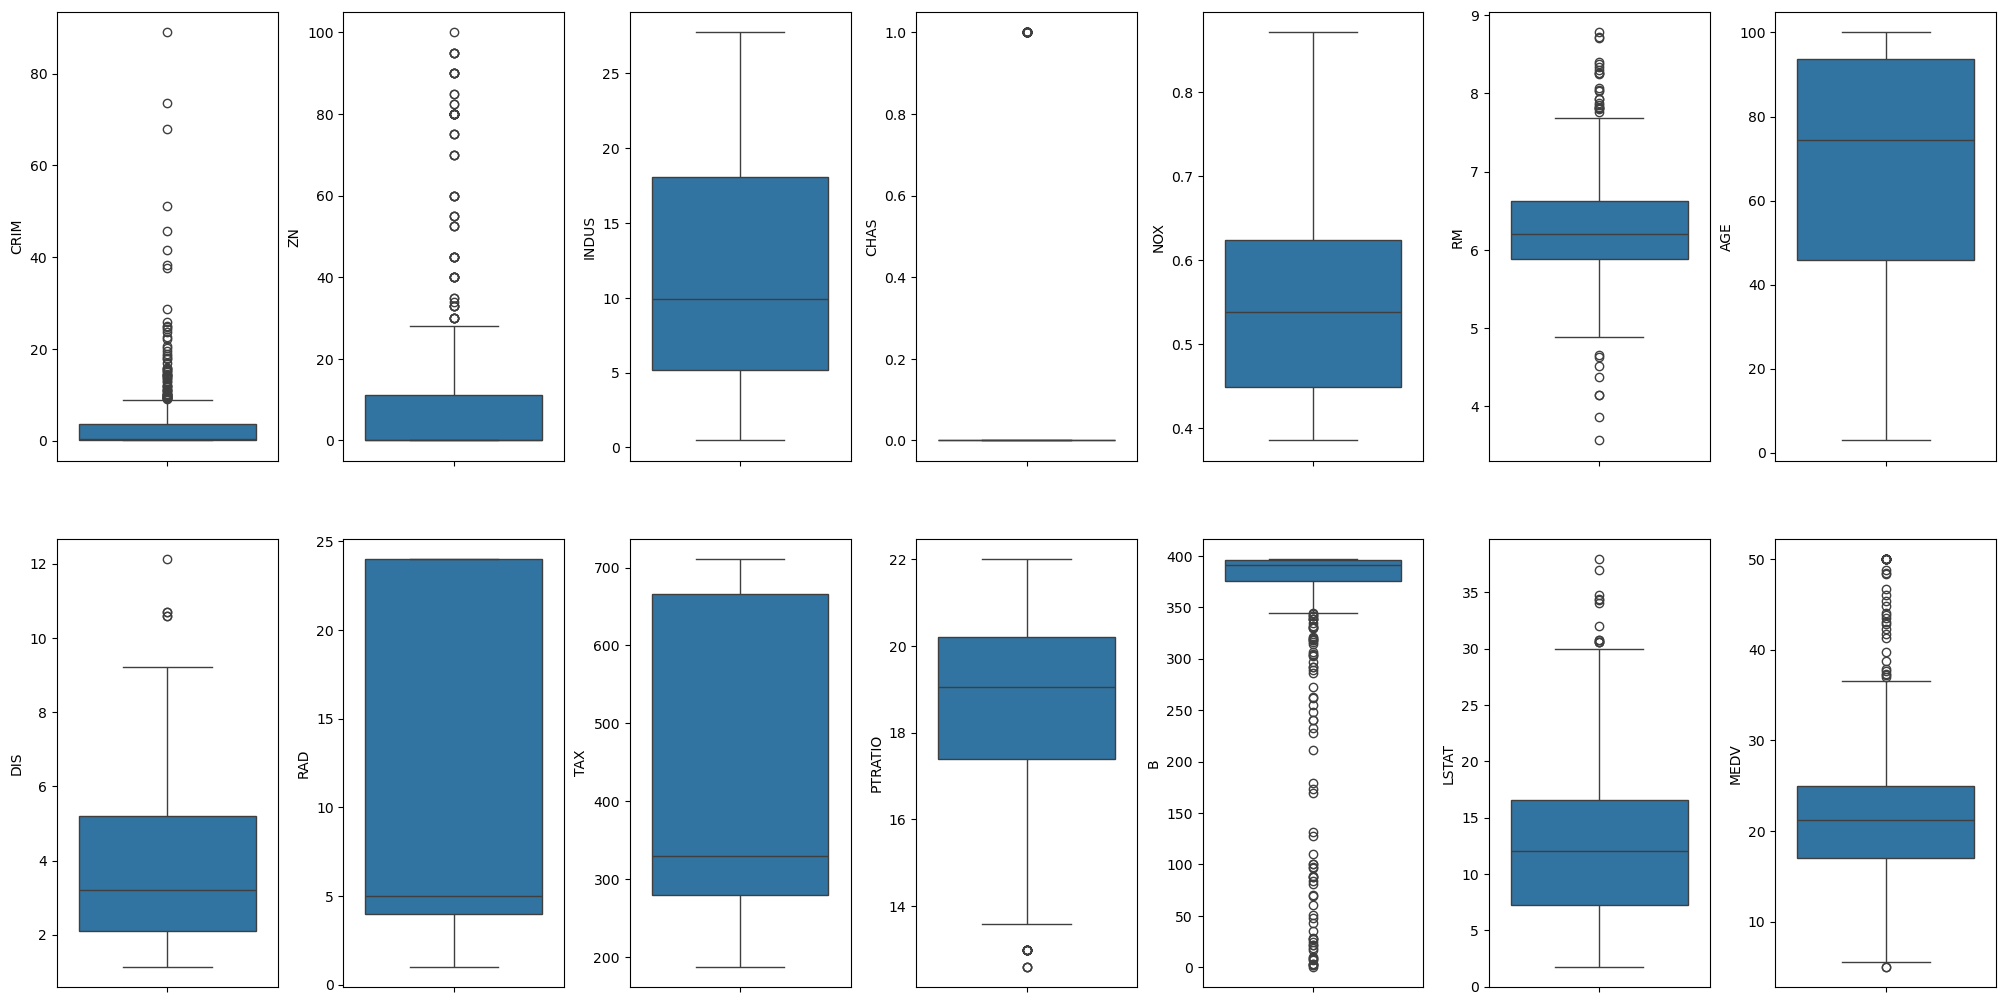

In [12]:
fig,ax = plt.subplots(ncols= 7,nrows = 2,figsize=(20,10))
index=0
ax = ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data = df,ax = ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad= 0.7,h_pad=5.0)                     

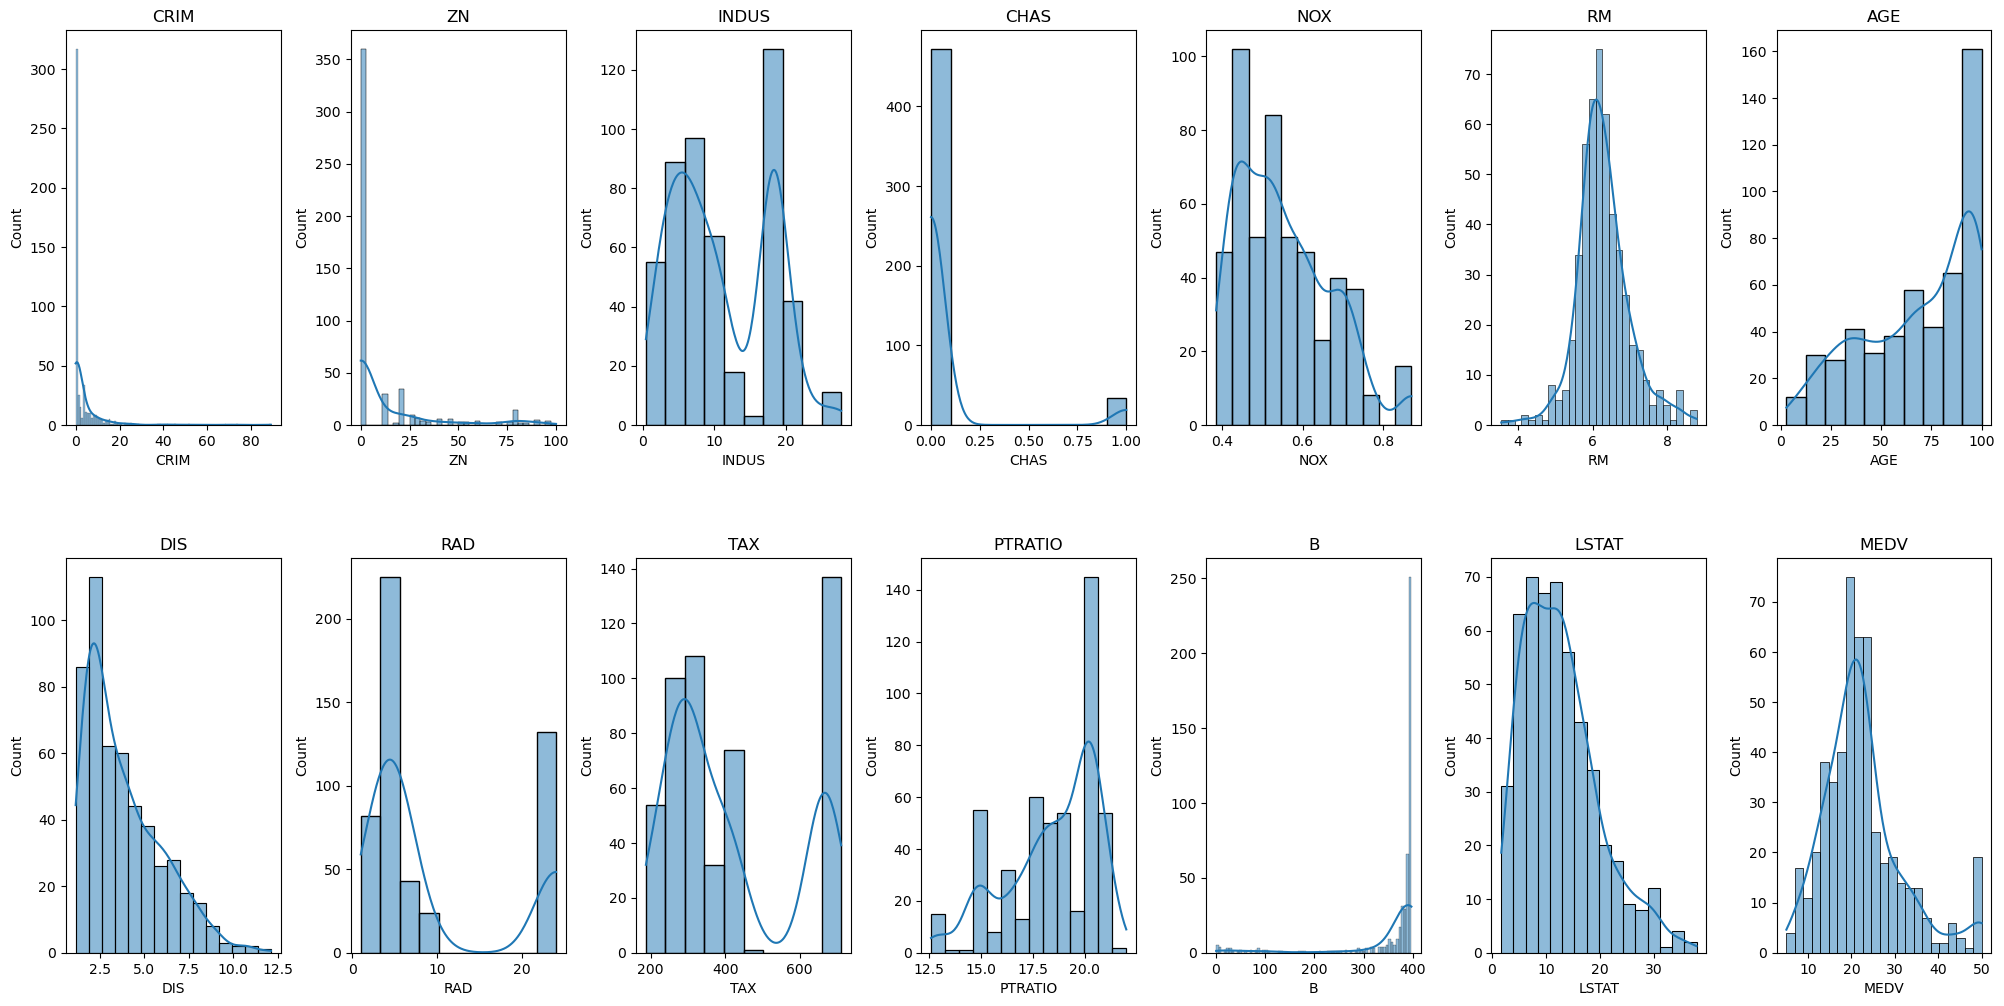

In [13]:

# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()


## Mix Max Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler 
cols=['CRIM', 'ZN','TAX','B']
scaler = MinMaxScaler()
df[cols] = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)


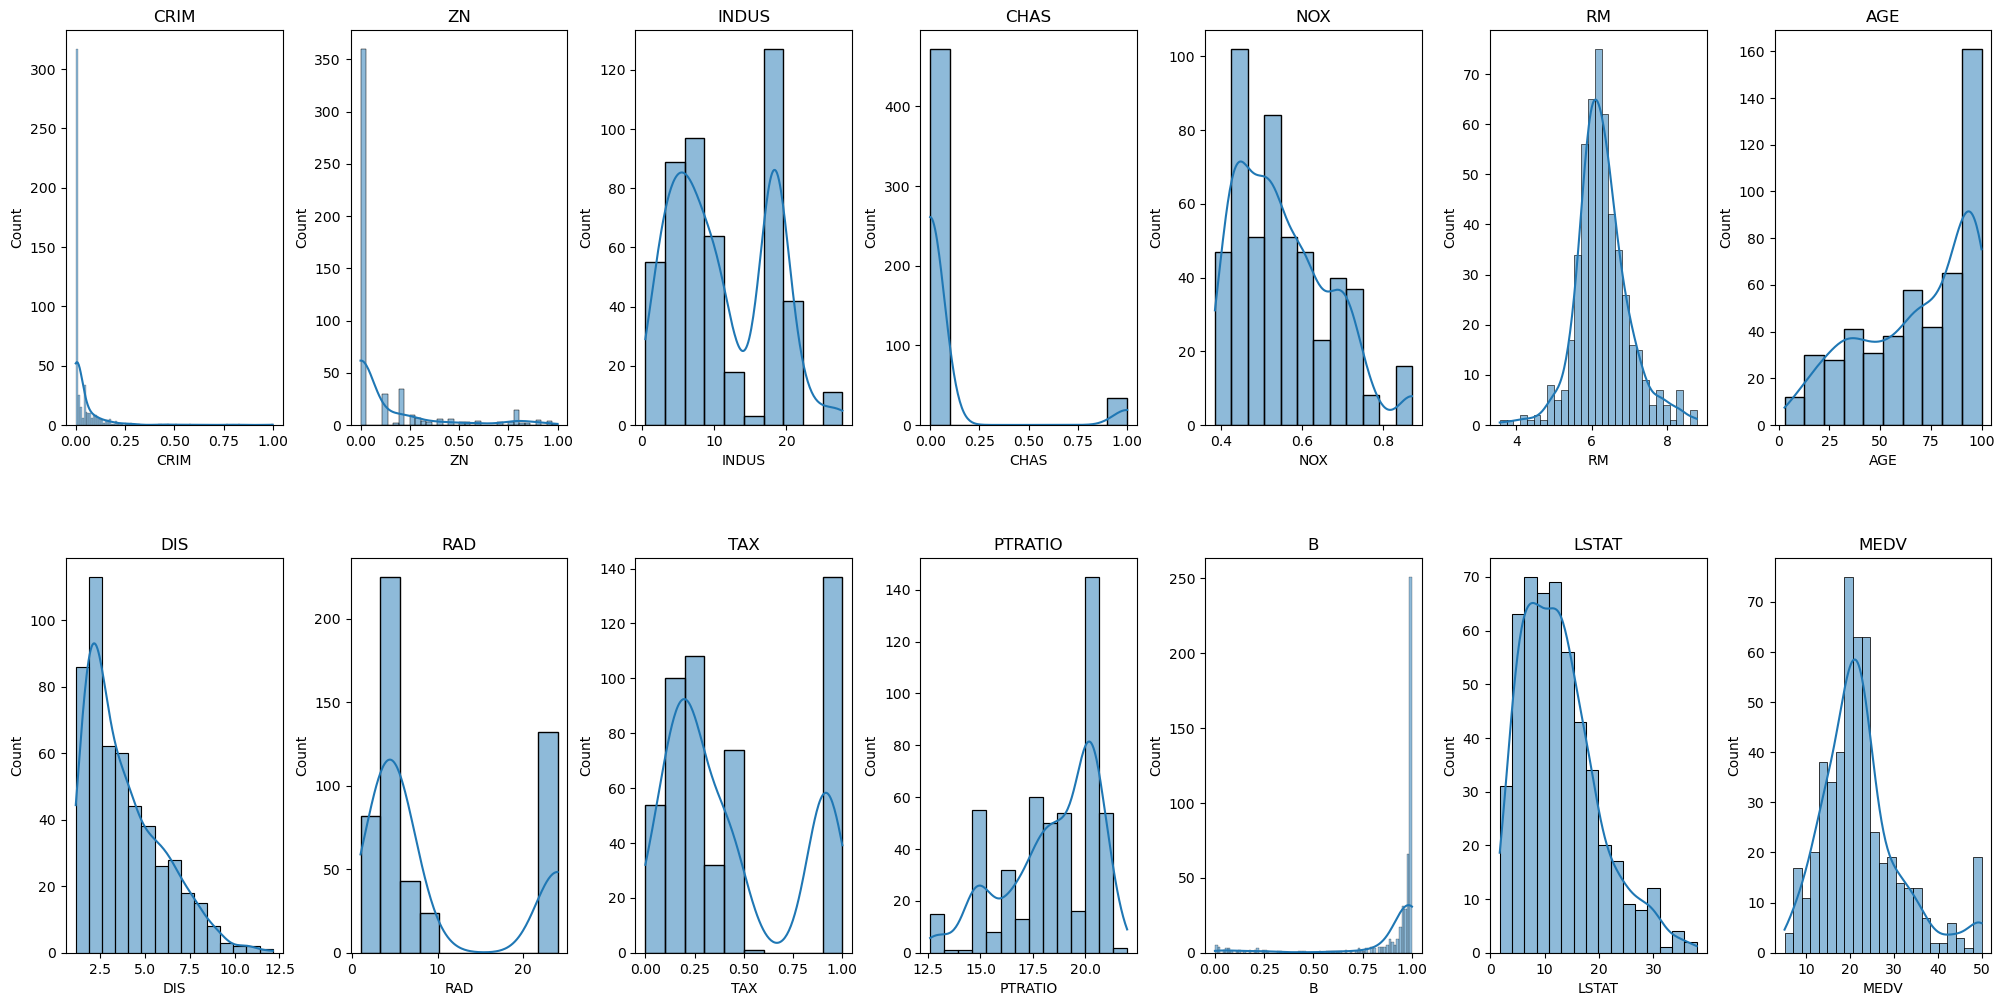

In [15]:

# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()


## Standardization 

In [16]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_cols = scaled.fit_transform(df[cols])
df[cols] = pd.DataFrame(scaled_cols,columns = cols)

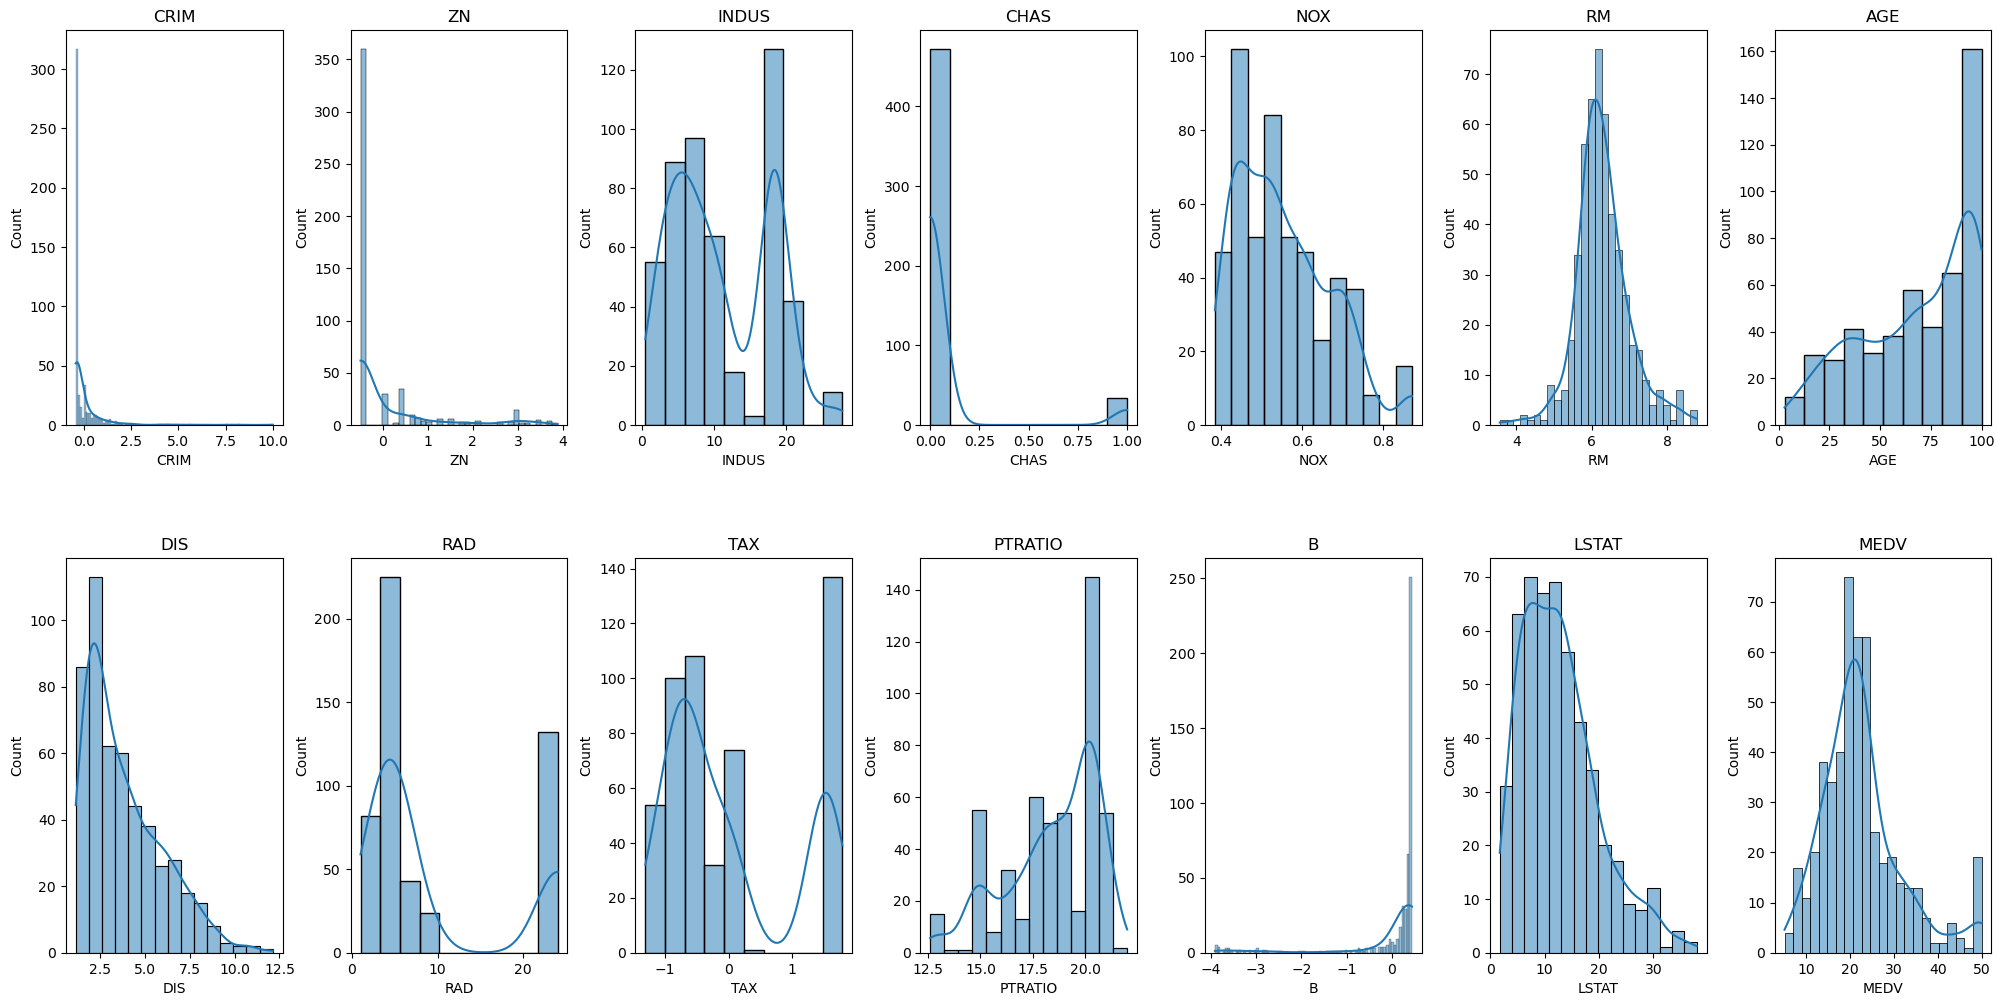

In [17]:

# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()


In [18]:
## Coorelations Martix 

<Axes: >

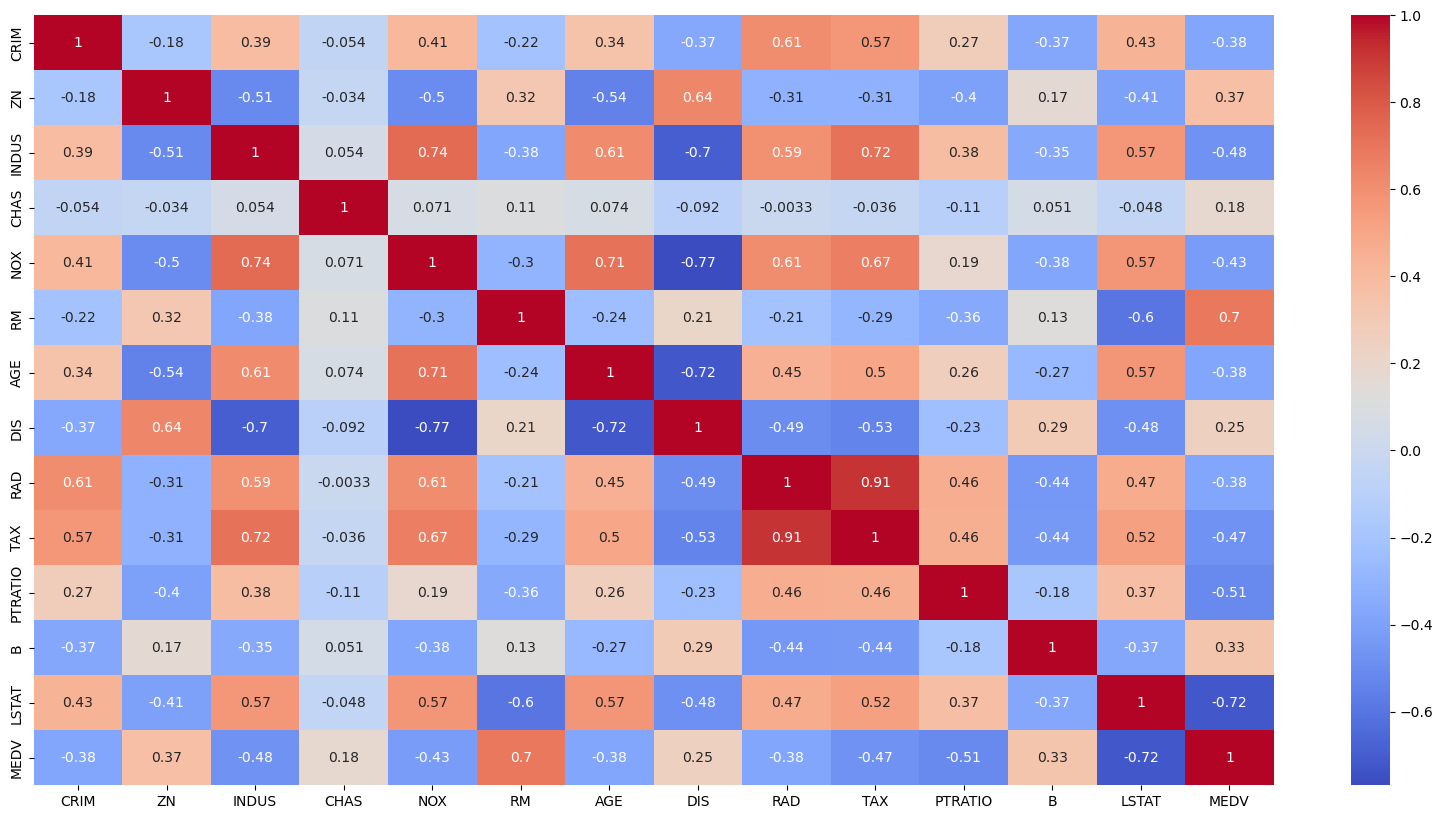

In [19]:
corr = df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

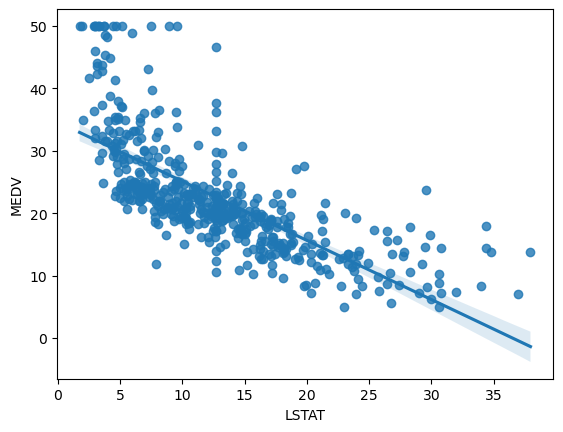

In [20]:
sns.regplot(y = df['MEDV'],x= df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

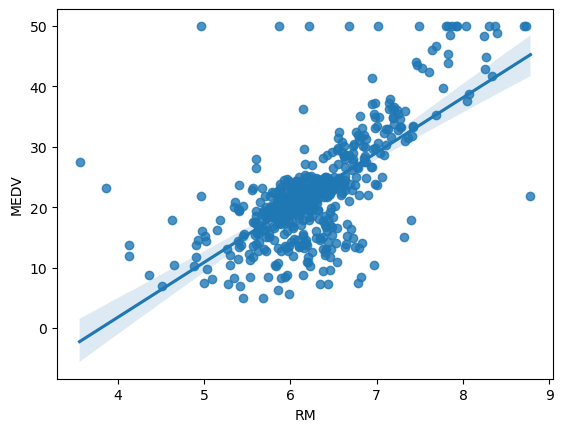

In [21]:
sns.regplot(y = df['MEDV'],x= df['RM'])

## Seperate Input Columns and Output Columns 

In [22]:
inputs = df.drop(columns= ['MEDV','RAD'])
targets = df['MEDV']

In [23]:
inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.422328,0.296443,2.31,0.0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.980000
1,-0.419870,-0.489639,7.07,0.0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.140000
2,-0.419872,-0.489639,7.07,0.0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.030000
3,-0.419277,-0.489639,2.18,0.0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.940000
4,-0.414981,-0.489639,2.18,0.0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,12.715432


In [24]:
targets.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Splitting the data into training and Testing 

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs, targets,test_size = 0.2, random_state= 42)

In [26]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((404, 12), (102, 12), (404,), (102,))

## Model_1: Linear Regression

In [27]:
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error

# Predictions
pred = model_1.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 26.847750248746262


## Model_2: Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor


model_2 = DecisionTreeRegressor()
model_2.fit(X_train,Y_train)                     


DecisionTreeRegressor()

In [30]:
from sklearn.metrics import mean_squared_error

# Predictions
pred = model_2.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 15.750392156862745


## Model_3: Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()
model_3.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
from sklearn.metrics import mean_squared_error

# Predictions
pred = model_3.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9.054186245098037


## Model_4: Extra Trees Regressor

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

model_4 = ExtraTreesRegressor()
model_4.fit(X_train,Y_train)

ExtraTreesRegressor()

In [34]:
from sklearn.metrics import mean_squared_error

# Predictions
pred = model_4.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10.64855079411764


In [35]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import Xgboost as xgb
model_5 = xgb.XGBRegressor()

ModuleNotFoundError: No module named 'Xgboost'